In [12]:
# Remove this cell if you don't use google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os

In [14]:
# change the path you use
cd '/content/drive/MyDrive/your_workspace/tacotron2'

/content/drive/.shortcut-targets-by-id/1mQ5CexiSXSxIuga_EdNGPwg5UvVjXutb/2021-1 융합캡스톤디자인/workspace/Tacotron-in-colab_yb/tacotron2


In [16]:
%tensorflow_version 1.x

In [17]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [18]:
!pip install jamo
!pip install Unidecode

In [19]:
# Use korean font in colab
%matplotlib inline  

import matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as font_manager

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = font_manager.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

font_manager._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [20]:
sys_font=font_manager.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/

Text(0.5, 1.0, '안녕하세요')

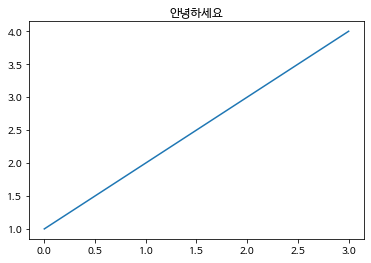

In [21]:
# check Korean font is printed well
import numpy as np

font_manager._rebuild()
plt.plot(np.array([1, 2, 3, 4]))
plt.title('안녕하세요')

# Tacotron2 for IU dataset

In [22]:
# preprocessing (Only for the first starting. Data will be saved into the out_dir)
!python preprocess.py --num_workers 8 --name iu --in_dir write_your_dataset_path/iu --out_dir ./data/iu

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Hyperparameters:
  adam_beta1: 0.9
  adam_beta2: 0.999
  allow_clipping_in_normalization: True
  attention_dim: 128
  attention_filters: 32
  attention_kernel: (31,)
  attention_size: 128
  attention_type: bah_mon_norm
  attention_win_size: 7
  cleaners: korean_cleaners
  clip_mels_length: True
  cumulative_weights: True
  dec_prenet_sizes: [256, 256]
  decoder_layers: 2
  decoder_lstm_units: 1024
  dilation_channels: 256
  dilations: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
  dropout_prob: 0.5
  embedding_size: 512
  enc_conv_channels: 512
  enc_conv_kernel_size: 5
  enc_conv_num_layers: 3


In [ ]:
# train tacotron2 without loading models (checkpoint).
!python train_tacotron2.py --data_paths ./data/iu --batch_size 32

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Step 2052    [1.710 sec/step, loss=0.84622, avg_loss=0.88524]
Generated 32 batches of size 32 in 10.818 sec
Step 2053    [1.751 sec/step, loss=0.72488, avg_loss=0.88379]
Step 2054    [1.730 sec/step, loss=0.85924, avg_loss=0.88366]
Step 2055    [1.721 sec/step, loss=0.92112, avg_loss=0.88376]
Step 2056    [1.728 sec/step, loss=0.85865, avg_loss=0.88357]
Step 2057    [1.723 sec/step, loss=0.88726, avg_loss=0.88325]
Step 2058    [1.712 sec/step, loss=0.92266, avg_loss=0.88350]
Step 2059    [1.705 sec/step, loss=0.89947, avg_loss=0.88350]
Step 2060    [1.706 sec/step, loss=0.86401, avg_loss=0.88270]
Step 2061    [1.706 sec/step, loss=0.87661, avg_loss=0.88272]
Step 2062    [1.697 sec/step, loss=0.87912, avg_loss=0.88288]
Step 2063    [1.693 sec/step, loss=0.92666, avg_loss=0.88340]
Step 2064    [1.693 sec/step, loss=0.90359, avg_loss=0.88359]
Step 2065    [1.690 sec/step, loss=0.87909, avg_loss=0.88351]
Step 2066    [1.689 sec/step, loss=0.84477, avg_lo

In [ ]:
#### Use this code if you want to resume. (training with pretrained models)
!python train_tacotron2.py --data_paths ./data/iu --batch_size 32 --load_path ./logdir-tacotron2/pretrained_checkpoint

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



UPDATE attention_kernel: (31,) -> [31]
UPDATE model_type: multi-speaker -> single-speaker
UPDATE postnet_kernel_size: (5,) -> [5]
['../../../data/Voice_IU/preprocess_result']
 [*] Checkpoint path: ./logdir-tacotron2/preprocess_result_2021-04-05_09-28-33/model.ckpt
 [*] Loading training data from: ['../../../data/Voice_IU/preprocess_result']
 [*] Using model: ./logdir-tacotron2/preprocess_result_2021-04-05_09-28-33
Hyperparameters:
  adam_beta1: 0.9
  adam_beta2: 0.999
  allow_clipping_in_normalization: True
  attention_dim: 128
  attention_filters: 32
  attention_kernel: [31]
  attention_size: 128
  attention_type: bah_mon_nor

# Tacotron2 for kss dataset

In [ ]:
# preprocessing (Only for the first starting. Data will be saved into the out_dir)
!python preprocess.py --num_workers 8 --name kss --in_dir write_your_dataset_path/kss --out_dir ./data/kss

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Hyperparameters:
  adam_beta1: 0.9
  adam_beta2: 0.999
  allow_clipping_in_normalization: True
  attention_dim: 128
  attention_filters: 32
  attention_kernel: (31,)
  attention_size: 128
  attention_type: bah_mon_norm
  attention_win_size: 7
  cleaners: korean_cleaners
  clip_mels_length: True
  cumulative_weights: True
  dec_prenet_sizes: [256, 256]
  decoder_layers: 2
  decoder_lstm_units: 1024
  dilation_channels: 256
  dilations: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
  dropout_prob: 0.5
  embedding_size: 512
  enc_conv_channels: 512
  enc_conv_kernel_size: 5
  enc_conv_num_layers: 3


In [ ]:
# train tacotron2 without loading models (checkpoint). use kss & iu dataset
!python train_tacotron2.py --data_paths ./data/kss,./data/iu --batch_size 32

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Step 2849    [1.446 sec/step, loss=0.92209, avg_loss=0.89426]
Step 2850    [1.448 sec/step, loss=0.89447, avg_loss=0.89357]
Step 2851    [1.440 sec/step, loss=0.90978, avg_loss=0.89379]
Step 2852    [1.440 sec/step, loss=0.95183, avg_loss=0.89399]
Step 2853    [1.376 sec/step, loss=0.89265, avg_loss=0.89376]
Step 2854    [1.370 sec/step, loss=0.92236, avg_loss=0.89414]
Step 2855    [1.370 sec/step, loss=0.91539, avg_loss=0.89429]
Step 2856    [1.370 sec/step, loss=0.91299, avg_loss=0.89417]
Step 2857    [1.372 sec/step, loss=0.89192, avg_loss=0.89389]
Step 2858    [1.372 sec/step, loss=0.90695, avg_loss=0.89369]
Step 2859    [1.373 sec/step, loss=0.90350, avg_loss=0.89362]
Step 2860    [1.379 sec/step, loss=0.90268, avg_loss=0.89389]
Step 2861    [1.408 sec/step, loss=0.65297, avg_loss=0.89140]
Step 2862    [1.405 sec/step, loss=0.93475, avg_loss=0.89189]
Step 2863    [1.405 sec/step, loss=0.91281, avg_loss=0.89222]
Step 2864    [1.405 sec/step, loss

In [ ]:
#### Use this code if you want to resume. (training with trained models)
!python train_tacotron2.py --data_paths ./data/kss,./data/iu --batch_size 32 --load_path ./logdir-tacotron2/pretrained_checkpoint --checkpoint_interval 500

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



UPDATE attention_kernel: (31,) -> [31]
UPDATE postnet_kernel_size: (5,) -> [5]
['../../../data/kss/kss_preprocess_result', '../../../data/Voice_IU/preprocess_result']
 [*] Checkpoint path: ./logdir-tacotron2/kss_preprocess_result+preprocess_result_2021-05-28_01-47-39/model.ckpt
 [*] Loading training data from: ['../../../data/kss/kss_preprocess_result', '../../../data/Voice_IU/preprocess_result']
 [*] Using model: ./logdir-tacotron2/kss_preprocess_result+preprocess_result_2021-05-28_01-47-39
Hyperparameters:
  adam_beta1: 0.9
  adam_beta2: 0.999
  allow_clipping_in_normalization: True
  attention_dim: 128
  attention_filters: 